## Pair Programming Encoding


En el pair programming de hoy usaremos el set de datos que guardastéis en el pair programming de normalización y estandarización.

Vuestro set de datos debería tener al menos una variable categórica, el objetivo del pair programming de hoy:


Hacer una códificación de la/las variables categóricas que tengáis en vuestro set de datos.

Recordad que lo primero que deberéis hacer es decidir su vuestras variables tienen o no orden, para que en función de esto uséis una aproximación u otra.


Guardad el dataframe, donde deberíais tener las variables estadandarizas, normalizadas y codificadas en un csv para usarlo en el próximo pairprogramming

In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import random 

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos
# ------------------------------------------------------------------------------
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
from sklearn.preprocessing import StandardScaler

plt.rcParams["figure.figsize"] = (10,8) 


pd.options.display.max_columns=None



In [3]:
df = pd.read_csv("../datos/sephora_website_dataset2.csv", index_col = 0)
df.sample(5)

,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,rating_norm,rating_log,rating_raiz,rating_minmax
id,,,,,,,,,,,,,,,,,,,,,,,,
1845338,COVER FX,Highlighter,The Perfect Light Highlighting Powder,0.28 oz/ 8.2806 mL,4.5,113,13900,34.0,34.0,https://www.sephora.com/product/the-perfect-li...,True,exclusive,no options,What it is:A silky- talc-free- pressed highlig...,Suggested Usage:-Using a powder brush- dust ov...,Mica- Boron Nitride- Zinc Stearate- Octyldodec...,0,1,0,0,0.101996,1.504077,2.121320,NaN
2164085,SEPHORA COLLECTION,Face Masks,Mask Stick,0.88oz/ 25g,4.5,256,40400,8.0,8.0,https://www.sephora.com/product/mask-stick-P44...,True,exclusive,no options,What it is: A line of face masks in stick for...,Suggested Usage:-Apply on clean dry skin and l...,-Watermelon: Nurtures skin.\nAqua (Water)- Gl...,0,1,0,0,0.101996,1.504077,2.121320,NaN
2002194,Dermalogica,Eye Creams & Treatments,Stress Positive Eye Lift Mask,0.85 oz/ 25 mL,4.5,24,5500,69.0,69.0,https://www.sephora.com/product/stress-positiv...,False,0,no options,What it is: A cooling eye mask that helps de-...,Suggested Usage:-Apply generously around clean...,-Fermented Yeast: Firms skin to help generate...,0,0,0,0,0.101996,1.504077,2.121320,NaN
1815851,Peter Thomas Roth,Eye Creams & Treatments,Retinol Fusion PM Eye Cream,0.5 oz,4.0,47,5200,55.0,55.0,https://www.sephora.com/product/retinol-fusion...,False,0,no options,Which skin type is it good for?✔ Normal✔ Oily✔...,Suggested Usage:-For optimal results- apply tw...,-Microencapsulated Retinol: Sustained release...,0,0,0,0,0.001996,1.386294,2.000000,NaN
2014785,SEPHORA COLLECTION,Foundation,Matte Perfection Full Coverage Foundation,1.01oz/30 mL,3.5,234,11700,20.0,20.0,https://www.sephora.com/product/matte-perfecti...,True,exclusive,no options,What it is: A full-coverage- matte-finish form...,Suggested Usage:\n-Ensure skin is thoroughly h...,Water- CI 77891 (Titanium Dioxide)- Dimethicon...,0,1,0,0,-0.098004,1.252763,1.870829,NaN


In [4]:
categoricas = df.select_dtypes(include = 'object')

In [5]:
df.drop(columns= ['how_to_use', 'options', 'brand', 'name', 'size', 'details', 'ingredients',"URL"] , inplace=True)


In [6]:
df.head()

,category,rating,number_of_reviews,love,price,value_price,MarketingFlags,MarketingFlags_content,online_only,exclusive,limited_edition,limited_time_offer,rating_norm,rating_log,rating_raiz,rating_minmax
id,,,,,,,,,,,,,,,,
2218774,Fragrance,4.0,4,3002,66.0,75.0,True,online only,1,0,0,0,0.001996,1.386294,2.000000,NaN
2044816,Cologne,4.5,76,2700,66.0,66.0,True,online only,1,0,0,0,0.101996,1.504077,2.121320,NaN
1417567,Perfume,4.5,26,2600,180.0,180.0,True,online only,1,0,0,0,0.101996,1.504077,2.121320,NaN
1417617,Perfume,4.5,23,2900,120.0,120.0,True,online only,1,0,0,0,0.101996,1.504077,2.121320,NaN
2218766,Fragrance,3.5,2,943,72.0,80.0,True,online only,1,0,0,0,-0.098004,1.252763,1.870829,NaN


In [7]:
lista_categoricas=['MarketingFlags_content','MarketingFlags']

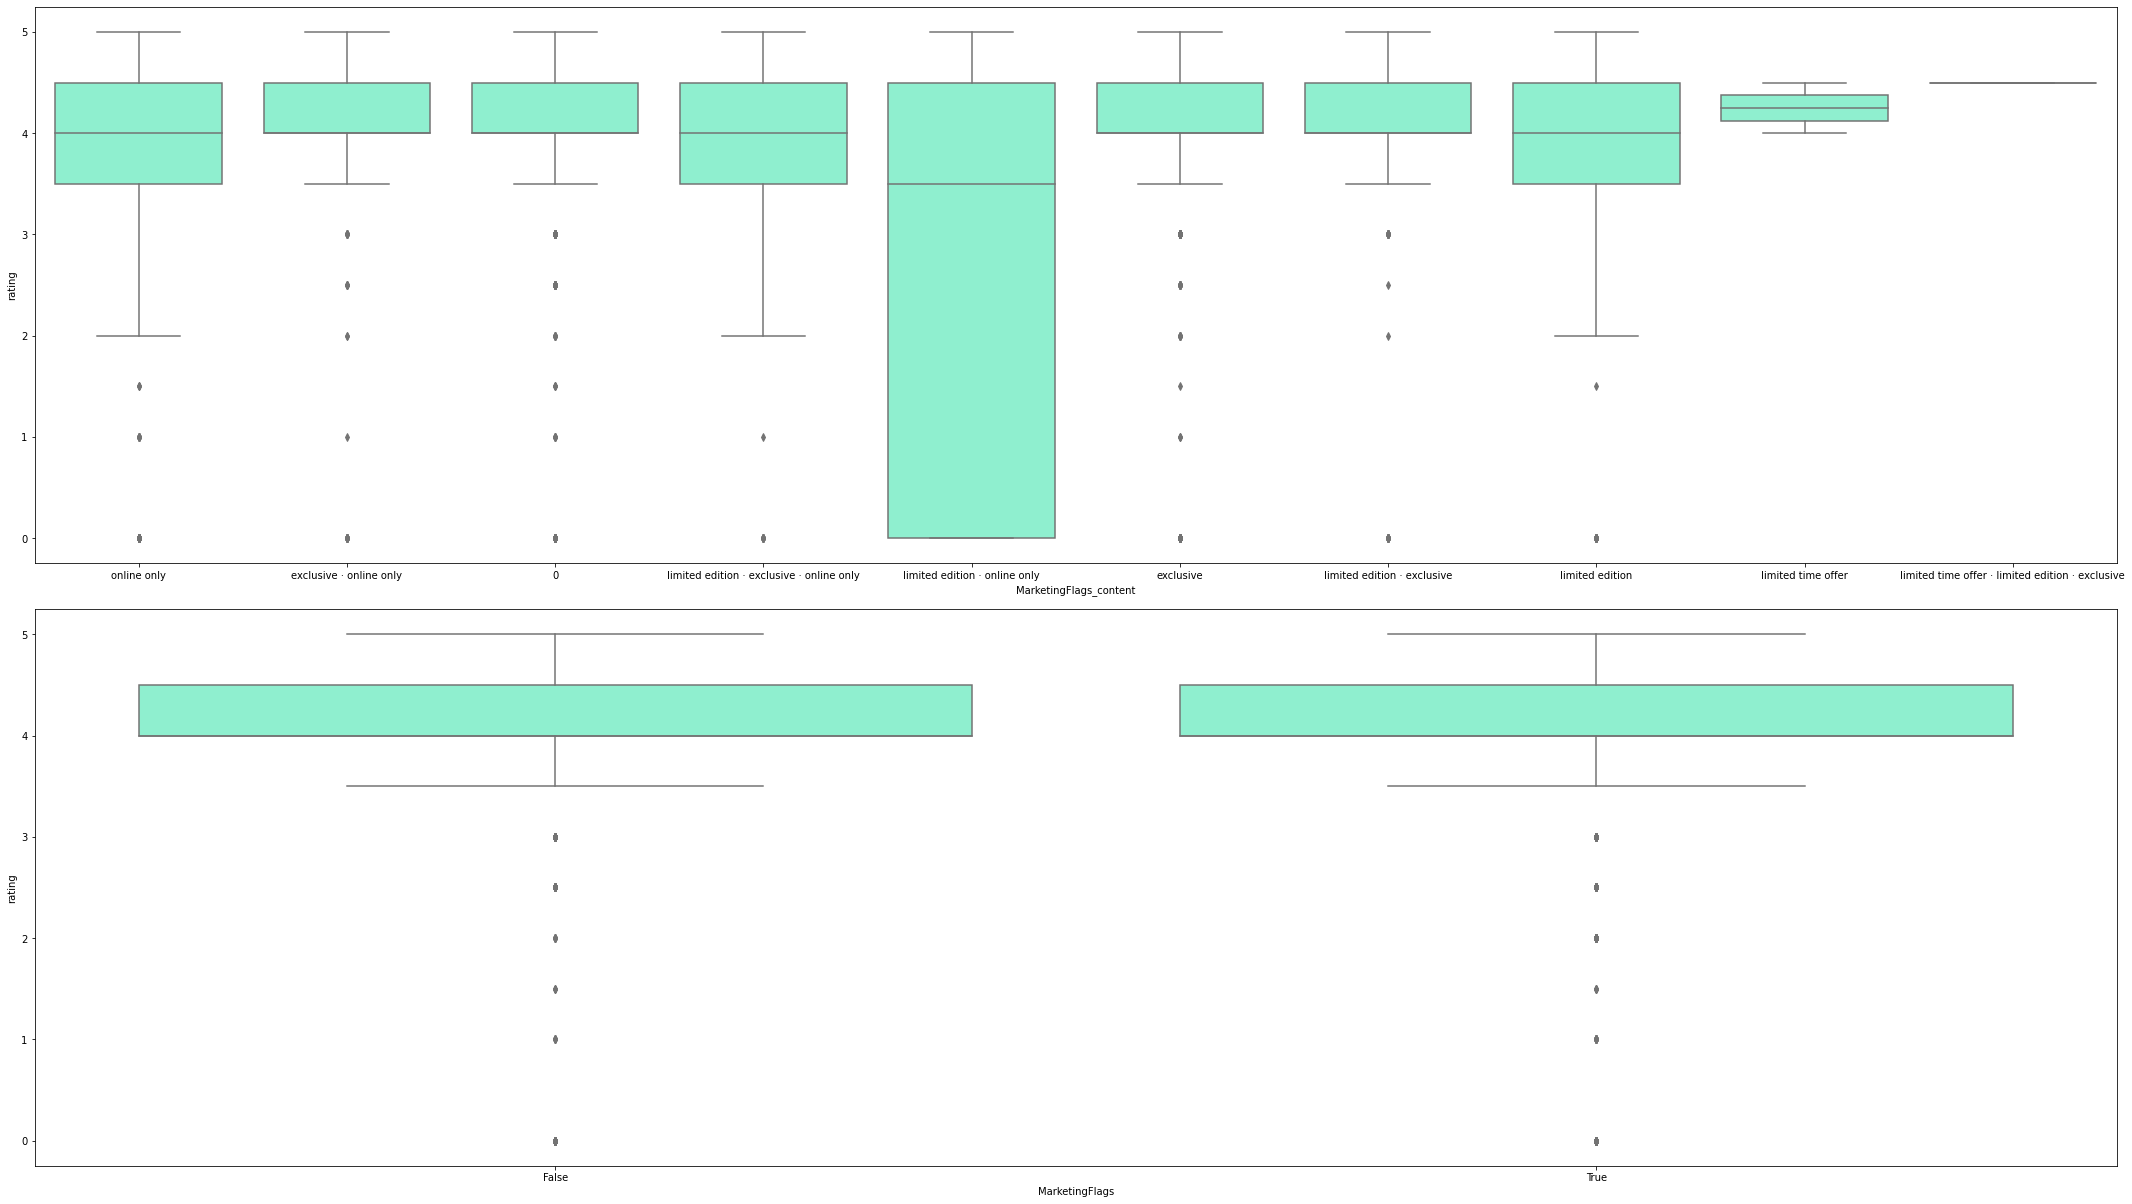

In [8]:


fig, axes = plt.subplots(3, 1, figsize=(30,25))

axes = axes.flat

for indice, columna in enumerate(lista_categoricas):
    sns.boxplot(x = columna, y = 'rating' , data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()



In [9]:
df['MarketingFlags'].unique()

array([ True, False])

In [10]:
print(df['MarketingFlags'].dtype)

bool


In [11]:
df["MarketingFlags"].isnull().sum()

0

Decidimos quedarnos con la variable MarketingFlags como ordinal

In [12]:
flag_map = {False:0, True:1} 

In [13]:
df['MarketingFlags_map'] = df['MarketingFlags'].map(flag_map)

In [14]:
df.head(30)

,category,rating,number_of_reviews,love,price,value_price,MarketingFlags,MarketingFlags_content,online_only,exclusive,limited_edition,limited_time_offer,rating_norm,rating_log,rating_raiz,rating_minmax,MarketingFlags_map
id,,,,,,,,,,,,,,,,,
2218774,Fragrance,4.0,4,3002,66.0,75.0,True,online only,1,0,0,0,0.001996,1.386294,2.000000,NaN,1
2044816,Cologne,4.5,76,2700,66.0,66.0,True,online only,1,0,0,0,0.101996,1.504077,2.121320,NaN,1
1417567,Perfume,4.5,26,2600,180.0,180.0,True,online only,1,0,0,0,0.101996,1.504077,2.121320,NaN,1
1417617,Perfume,4.5,23,2900,120.0,120.0,True,online only,1,0,0,0,0.101996,1.504077,2.121320,NaN,1
2218766,Fragrance,3.5,2,943,72.0,80.0,True,online only,1,0,0,0,-0.098004,1.252763,1.870829,NaN,1
1417609,Perfume,4.5,79,2600,180.0,180.0,True,online only,1,0,0,0,0.101996,1.504077,2.121320,NaN,1
1638832,Perfume,4.5,79,5000,210.0,210.0,True,online only,1,0,0,0,0.101996,1.504077,2.121320,NaN,1
1284462,Cologne,5.0,13,719,120.0,120.0,True,online only,1,0,0,0,0.201996,1.609438,2.236068,NaN,1
2221588,Body Mist & Hair Mist,4.0,5,800,58.0,58.0,True,online only,1,0,0,0,0.001996,1.386294,2.000000,NaN,1


In [15]:
df['MarketingFlags_content'].value_counts()

0                                                   4786
exclusive                                           1692
online only                                         1528
exclusive · online only                              318
limited edition · exclusive                          297
limited edition                                      237
limited edition · online only                        188
limited edition · exclusive · online only            119
limited time offer                                     2
limited time offer · limited edition · exclusive       1
Name: MarketingFlags_content, dtype: int64

In [16]:
df["MarketingFlags_content"].unique()

array(['online only', 'exclusive · online only', '0',
       'limited edition · exclusive · online only',
       'limited edition · online only', 'exclusive',
       'limited edition · exclusive', 'limited edition',
       'limited time offer',
       'limited time offer · limited edition · exclusive'], dtype=object)

In [17]:
print(df['MarketingFlags_content'].dtype)

object


In [18]:
df["MarketingFlags_content"].isnull().sum()

0

In [19]:
flag_map2 = {"0":0,                                                 
            "exclusive" :1,                                     
            "online only":2,                                       
            "exclusive · online only"  :3,                           
            "limited edition · exclusive"  :4,                        
            "limited edition"  :5,                                   
            "limited edition · online only":6,                      
            "limited edition · exclusive · online only"  :7,       
            "limited time offer":8,                                
            "limited time offer · limited edition · exclusive" :9}       

In [20]:
df["MarketingFlags_content"].unique()

array(['online only', 'exclusive · online only', '0',
       'limited edition · exclusive · online only',
       'limited edition · online only', 'exclusive',
       'limited edition · exclusive', 'limited edition',
       'limited time offer',
       'limited time offer · limited edition · exclusive'], dtype=object)

In [21]:
df["MarketingFlags_content_map2"] = df['MarketingFlags_content'].map(flag_map2)

In [22]:
df.head(30)

,category,rating,number_of_reviews,love,price,value_price,MarketingFlags,MarketingFlags_content,online_only,exclusive,limited_edition,limited_time_offer,rating_norm,rating_log,rating_raiz,rating_minmax,MarketingFlags_map,MarketingFlags_content_map2
id,,,,,,,,,,,,,,,,,,
2218774,Fragrance,4.0,4,3002,66.0,75.0,True,online only,1,0,0,0,0.001996,1.386294,2.000000,NaN,1,2
2044816,Cologne,4.5,76,2700,66.0,66.0,True,online only,1,0,0,0,0.101996,1.504077,2.121320,NaN,1,2
1417567,Perfume,4.5,26,2600,180.0,180.0,True,online only,1,0,0,0,0.101996,1.504077,2.121320,NaN,1,2
1417617,Perfume,4.5,23,2900,120.0,120.0,True,online only,1,0,0,0,0.101996,1.504077,2.121320,NaN,1,2
2218766,Fragrance,3.5,2,943,72.0,80.0,True,online only,1,0,0,0,-0.098004,1.252763,1.870829,NaN,1,2
1417609,Perfume,4.5,79,2600,180.0,180.0,True,online only,1,0,0,0,0.101996,1.504077,2.121320,NaN,1,2
1638832,Perfume,4.5,79,5000,210.0,210.0,True,online only,1,0,0,0,0.101996,1.504077,2.121320,NaN,1,2
1284462,Cologne,5.0,13,719,120.0,120.0,True,online only,1,0,0,0,0.201996,1.609438,2.236068,NaN,1,2
2221588,Body Mist & Hair Mist,4.0,5,800,58.0,58.0,True,online only,1,0,0,0,0.001996,1.386294,2.000000,NaN,1,2


In [23]:
df.to_csv("../datos/sephora_website_dataset4.csv")